In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import json
import requests

link = "https://api.rootnet.in/covid19-in/unofficial/covid19india.org"
f = requests.get(link)
j_data = json.loads(f.text)
data = pd.DataFrame([j_data])
#data = pd.read_json("ptd.json")
df = pd.DataFrame(data['data'][0]['rawPatientData'])
#df = pd.DataFrame(df['raw_data'].to_list())
df_city = df
df_city

,patientId,reportedOn,onsetEstimate,ageEstimate,gender,city,district,state,status,notes,contractedFrom,sources,nationality,place_attributes,relationship,travel
0,1,30/01/2020,,20,female,Thrissur,Thrissur,Kerala,Recovered,Travelled from Wuhan,,[https://twitter.com/vijayanpinarayi/status/12...,[],"[{'is_foreign': True, 'place': 'Wuhan'}]",[],[Wuhan]
1,2,02/02/2020,,,female,Alappuzha,Alappuzha,Kerala,Recovered,Travelled from Wuhan,,[https://www.indiatoday.in/india/story/kerala-...,[],"[{'is_foreign': True, 'place': 'Wuhan'}]",[],[Wuhan]
2,3,03/02/2020,,,female,Kasaragod,Kasaragod,Kerala,Recovered,Travelled from Wuhan,,[https://www.indiatoday.in/india/story/kerala-...,[],"[{'is_foreign': True, 'place': 'Wuhan'}]",[],[Wuhan]
3,4,02/03/2020,,45,male,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,"Travelled from Austria, Italy",,[https://www.indiatoday.in/india/story/not-a-j...,[],"[{'is_foreign': True, 'place': 'Austria'}, {'i...",[],"[Austria, Italy]"
4,5,02/03/2020,,24,male,Hyderabad,Hyderabad,Telangana,Recovered,,,[https://indianexpress.com/article/india/coron...,[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,761,27/03/2020,,22,male,,Uttara Kannada,Karnataka,Hospitalized,Travelled from Dubai,,[https://twitter.com/IEBengaluru/status/124346...,[],"[{'is_foreign': True, 'place': 'Dubai'}]",[],[Dubai]
760,762,27/03/2020,,,female,,Thiruvanathapuram,Kerala,Hospitalized,"Foreign travel history (details awaited), Nati...",,[https://english.mathrubhumi.com/news/kerala/m...,[],[],"[{'link': 'Native', 'with': []}]",[]
761,763,27/03/2020,,,female,,Gautam Buddha Nagar,Uttar Pradesh,Hospitalized,Details Awaited,,[https://twitter.com/PTI_News/status/124346843...,[],[],[],[]
762,764,27/03/2020,,,male,,Gautam Buddha Nagar,Uttar Pradesh,Hospitalized,Details Awaited,,[https://twitter.com/PTI_News/status/124346843...,[],[],[],[]


## recovery chances vs age

Lets see if there is any relationship between age and recevory chances

In [3]:
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df.fillna(value={'ageEstimate':'-1'})
df["ageEstimate"] = pd.to_numeric(df["ageEstimate"])
df.sort_values("ageEstimate", axis = 0, ascending = True, 
                 inplace = True) 
#df["ageEstimate"].to_list()

plot the graph between age groups, total cases and reccovered cases

In [4]:

bins = [0,10, 20, 30,40, 50, 60, 70,120]
labels = ['0-9','10-19', '20-29','30-39', '40-49', '50-59', '60-69', '70+']
df_recovered = df[df['status']=='Recovered']

df['ageEstimate'] = pd.cut(df.ageEstimate, bins, labels = labels,include_lowest = True)
df_recovered['ageEstimate'] = pd.cut(df_recovered.ageEstimate, bins, labels = labels,include_lowest = True)


#ax = sns.barplot(x=df['agerange'].value_counts().index, y=df['agerange'].value_counts(),color="r",label="Total")
#ax = sns.barplot(x=df_recovered['agerange'].value_counts().index, y=df_recovered['agerange'].value_counts(),color="g",label="Recovered")
#ax.legend(ncol=2, loc="top right", frameon=True)


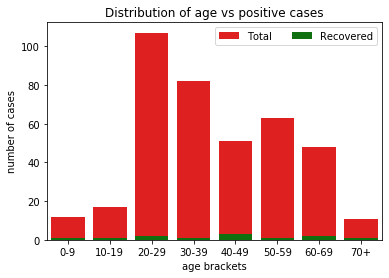

Total cases:764	Recovered:25


In [5]:
g = sns.countplot(df['ageEstimate'],color="r",label="Total")
g = sns.countplot(df_recovered['ageEstimate'],color="g",label="Recovered")
g.set_ylabel('number of cases')
g.set_xlabel('age brackets')
g.set_title('Distribution of age vs positive cases')
g.legend(ncol=2, loc="top right", frameon=True)
plt.show()
print("Total cases:{}\tRecovered:{}".format(len(df['ageEstimate']),len(df_recovered['ageEstimate'])))

Number of persons came from abroad:378	Number of persons infected from primary contacts:386


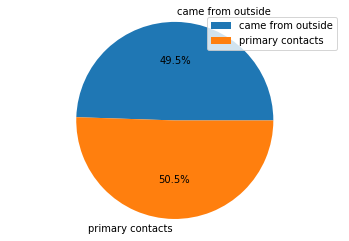

In [6]:
df_from_out =df_city[~df_city['notes'].str.contains("Travelled")]
df_from_in =df_city[df_city['notes'].str.contains("Travelled")]
sizes = [len(df_from_out['notes'].to_list()),len(df_from_in['notes'].to_list())]
print("Number of persons came from abroad:{}\tNumber of persons infected from primary contacts:{}".format(sizes[0],sizes[1]))
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=['came from outside', 'primary contacts'], autopct='%1.1f%%', shadow=False)
ax1.axis('equal')
ax1.legend(ncol=1, loc="top right", frameon=True)
plt.show()

In [7]:
df_city.iloc[181]

patientId                                                         182
reportedOn                                                 19/03/2020
onsetEstimate                                                        
ageEstimate                                                        70
gender                                                           male
city                                                            Banga
district                                   Shaheed Bhagat Singh Nagar
state                                                          Punjab
status                                                       Deceased
notes                                Travelled from Germany via Italy
contractedFrom                                                       
sources             [https://www.indiatoday.in/india/story/coronav...
nationality                                                        []
place_attributes    [{'is_foreign': True, 'place': 'Germany'}, {'i...
relationship        

In [13]:
df_city[df_city['state'] =='Karnataka'].tail(20)

,patientId,reportedOn,onsetEstimate,ageEstimate,gender,city,district,state,status,notes,contractedFrom,sources,nationality,place_attributes,relationship,travel
628,629,25/03/2020,,37,female,Chitradurga,Chitradurga,Karnataka,Hospitalized,Travel history to Guyana and arrived in Bangal...,,[https://twitter.com/DHFWKA/status/12428046631...,[],"[{'is_foreign': True, 'place': 'Guyana'}, {'is...",[],"[Guyana, Bangalore, Delhi]"
629,630,25/03/2020,,63,male,Bengaluru,Bengaluru,Karnataka,Hospitalized,"Travel History to Brazil, Argentina and arrive...",,[https://twitter.com/DHFWKA/status/12428046631...,[],"[{'is_foreign': True, 'place': 'Brazil'}, {'is...",[],"[Brazil, Argentina, Bangalore]"
630,631,25/03/2020,,59,female,Bengaluru,Bengaluru,Karnataka,Hospitalized,"Travel History to Brazil, Argentina and arrive...",P630,[https://twitter.com/DHFWKA/status/12428046631...,[],"[{'is_foreign': True, 'place': 'Brazil'}, {'is...","[{'link': 'Wife', 'with': ['P630']}]","[Brazil, Argentina, Bangalore]"
631,632,25/03/2020,,26,male,Bengaluru,Bengaluru,Karnataka,Hospitalized,Travel History to Spain and arrived in Bangalo...,,[https://twitter.com/DHFWKA/status/12428046631...,[],"[{'is_foreign': True, 'place': 'Spain'}, {'is_...",[],"[Spain, Bangalore, Dubai]"
632,633,25/03/2020,,26,male,Bengaluru,Bengaluru,Karnataka,Hospitalized,Travel History to Spain and arrived in Bangalo...,P632,[https://twitter.com/DHFWKA/status/12428046631...,[],"[{'is_foreign': True, 'place': 'Spain'}, {'is_...",[],"[Spain, Bangalore, Dubai]"
633,634,25/03/2020,,63,female,Bengaluru,Bengaluru,Karnataka,Hospitalized,Travel History to Athens and London and arrive...,,[https://twitter.com/DHFWKA/status/12428046631...,[],"[{'is_foreign': True, 'place': 'Athens'}, {'is...",[],"[Athens, London, Bangalore]"
634,635,25/03/2020,,69,male,Bengaluru,Bengaluru,Karnataka,Hospitalized,Travel History to Athens and London and arrive...,P634,[https://twitter.com/DHFWKA/status/12428046631...,[],"[{'is_foreign': True, 'place': 'Athens'}, {'is...","[{'link': 'Husband', 'with': ['P634']}]","[Athens, London, Bangalore]"
635,636,25/03/2020,,9,female,Bengaluru,Bengaluru,Karnataka,Hospitalized,"Daughter of P297, KA-P17",P297,[https://twitter.com/DHFWKA/status/12428046631...,[],[],"[{'link': 'Daughter', 'with': ['P297', 'P17']}]",[]
636,637,25/03/2020,,7,female,Bengaluru,Bengaluru,Karnataka,Hospitalized,"Daughter of P297, KA-P17",P297,[https://twitter.com/DHFWKA/status/12428046631...,[],[],"[{'link': 'Daughter', 'with': ['P297', 'P17']}]",[]
688,689,26/03/2020,,35,male,,Mysuru,Karnataka,Hospitalized,Had been in contact with healthcare profession...,,[https://twitter.com/DHFWKA/status/12431044705...,[],[],[],[]


In [8]:
#!pip install requests bs4
from bs4 import BeautifulSoup as bs
import requests
USER_AGENT = "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36"
# US english
LANGUAGE = "en-US,en;q=0.5"
def get_weather_data(url):
    session = requests.Session()
    session.headers['User-Agent'] = USER_AGENT
    session.headers['Accept-Language'] = LANGUAGE
    session.headers['Content-Language'] = LANGUAGE
    html = session.get(url)
    # create a new soup
    soup = bs(html.text, "html.parser")
    result = {}
    # extract region
    result['region'] = soup.find("div", attrs={"id": "wob_loc"}).text
    # extract temperature now
    result['temp_now'] = soup.find("span", attrs={"id": "wob_tm"}).text
    # get the day and hour now
    result['dayhour'] = soup.find("div", attrs={"id": "wob_dts"}).text
    # get the actual weather
    result['weather_now'] = soup.find("span", attrs={"id": "wob_dc"}).text
    # get the precipitation
    result['precipitation'] = soup.find("span", attrs={"id": "wob_pp"}).text
    # get the % of humidity
    result['humidity'] = soup.find("span", attrs={"id": "wob_hm"}).text
    # extract the wind
    result['wind'] = soup.find("span", attrs={"id": "wob_ws"}).text
    # get next few days' weather
    next_days = []
    days = soup.find("div", attrs={"id": "wob_dp"})
    for day in days.findAll("div", attrs={"class": "wob_df"}):
        # extract the name of the day
        day_name = day.find("div", attrs={"class": "vk_lgy"}).attrs['aria-label']
        # get weather status for that day
        weather = day.find("img").attrs["alt"]
        temp = day.findAll("span", {"class": "wob_t"})
        # maximum temparature in Celsius, use temp[1].text if you want fahrenheit
        max_temp = temp[0].text
        # minimum temparature in Celsius, use temp[3].text if you want fahrenheit
        min_temp = temp[2].text
        next_days.append({"name": day_name, "weather": weather, "max_temp": max_temp, "min_temp": min_temp})
    # append to result
    result['next_days'] = next_days
    return result


In [9]:
def get_average_temperature(data):
    
    
    for dayweather in data["next_days"]:
        print("="*40, dayweather["name"], "="*40)
        print("Description:", dayweather["weather"])
        print(f"Max temperature: {dayweather['max_temp']}°C")
        print(f"Min temperature: {dayweather['min_temp']}°C")
    

In [10]:

URL = "https://www.google.com/search?lr=lang_en&ie=UTF-8&q=weather"

URL += 'ranni'
# get data
data = get_weather_data(URL)
temp = get_average_temperature(data)

print("Weather for:", data["region"])
print("Now:", data["dayhour"])
print(f"Temperature now: {data['temp_now']}°C")
print("Description:", data['weather_now'])
print("Precipitation:", data["precipitation"])
print("Humidity:", data["humidity"])
print("Wind:", data["wind"])
print("Next days:")
for dayweather in data["next_days"]:
    print("="*40, dayweather["name"], "="*40)
    print("Description:", dayweather["weather"])
    print(f"Max temperature: {dayweather['max_temp']}°C")
    print(f"Min temperature: {dayweather['min_temp']}°C")

======================================== Friday ========================================
Description: Isolated thunderstorms
Max temperature: 36°C
Min temperature: 25°C
======================================== Saturday ========================================
Description: Sunny
Max temperature: 37°C
Min temperature: 26°C
======================================== Sunday ========================================
Description: Partly cloudy
Max temperature: 36°C
Min temperature: 26°C
======================================== Monday ========================================
Description: Mostly sunny
Max temperature: 37°C
Min temperature: 26°C
======================================== Tuesday ========================================
Description: Mostly sunny
Max temperature: 38°C
Min temperature: 26°C
======================================== Wednesday ========================================
Description: Mostly sunny
Max temperature: 37°C
Min temperature: 26°C
====================================